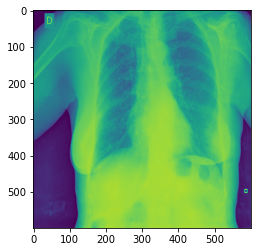

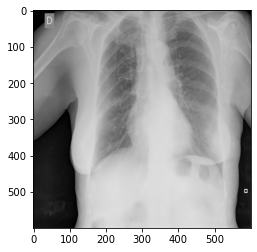

(600, 600, 3)
(512, 512, 3)
(512, 512, 3)
(600, 600, 3)


In [3]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('./TEST_IMG/study/0d476d070d71_study.png')
img2=cv2.imread('./TEST_IMG/image/00fc8fc35dc1_image.png')
img3=cv2.imread('./TRAIN_IMG/image/000a312787f2_image.png')
img4 = cv2.imread('./TRAIN_IMG/study/0a763df67cdc_study.png')
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2] # 모두 같은값...! 심지어 cv2에서 grayscale과도 같음... (600,600)
plt.imshow(b)
plt.show()
plt.imshow(img)
plt.show()
print(img.shape)
print(img2.shape)
print(img3.shape)
print(img4.shape)
# plt.imshow(g)
# plt.show()
# plt.imshow(r)
# plt.show()

(600, 600)


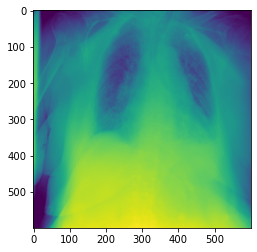

In [2]:
gray = cv2.imread('./TRAIN_IMG/study/00086460a852_study.png', cv2.IMREAD_GRAYSCALE)
print(gray.shape)
plt.imshow(gray)

## 이진화 하기

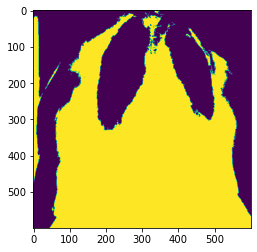

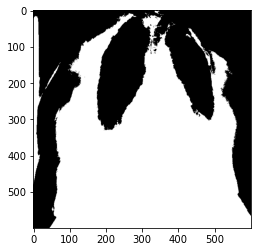

In [3]:
ret, thres1 =cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thres1)
plt.show()
plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
plt.show()


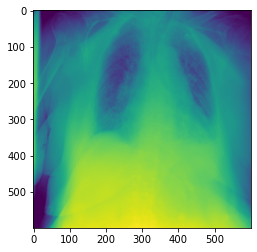

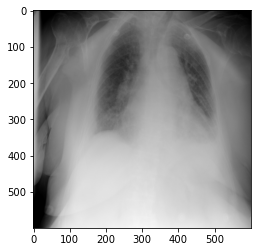

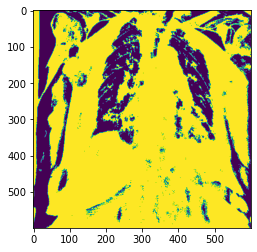

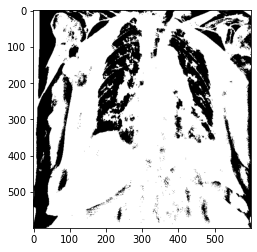

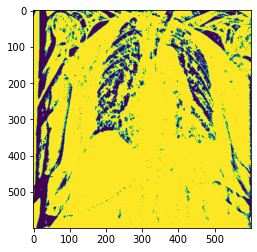

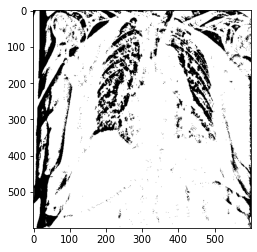

In [4]:
# 이미지 적응 임계점 처리
ret, thres1 = cv2.threshold(gray, 123, 255, cv2.THRESH_BINARY_INV)
thres2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,55,3)
thres3 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,55,3)
thres2_img = cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB)
thres3_img = cv2.cvtColor(thres3, cv2.COLOR_GRAY2RGB)

ls = [gray, img, thres2, thres2_img,thres3,thres3_img]
# figure,axs = plt.subplots()
for i in ls:
    plt.imshow(i)
    plt.show()

In [ ]:
# 5 + 2 데이터셋 만들 것.

In [5]:
mean = gray[100:500,100:500].mean()

In [ ]:
!mkdir 


In [25]:

def thresh_trunc(level, file_list, thr=190):
    ls = []
    for nm in file_list:
        one_ch = cv2.imread(f'/kaggle/input/siimcovid19-512-img-png-600-study-png/{level}/{nm}', cv2.IMREAD_GRAYSCALE)
        ret, thres =cv2.threshold(one_ch, thr, 255, cv2.THRESH_TRUNC) 
        ls.append(thres)
    
    for idx, i in enumerate(ls):
        if idx % 2 == 0:
            print('#################################')
    #         plt.imshow(i)
    #         plt.show()
        plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
        plt.show()


## 정리

* trunc 190
* tozero 64
* tozero_inv 190

* mean_c : 101 81 61 41
* mean_c inv : 81 41

In [82]:
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

file_list_sd = os.listdir('./TRAIN_IMG/study')
file_list_im = os.listdir('./TRAIN_IMG/image')

# #테스트
file_list = ['00086460a852_study.png','00e936c58da6_study.png',
             '01e030757f57_study.png','0369e0385796_study.png',
             '0172a5607c9d_study.png','018c96c9aeff_study.png',
            '019960c57d32_study.png','00792b5c8852_study.png']

def transform_trunc(level, file_list, thr=190):
    ls = []
    for nm in tqdm(file_list):

        file_ls = file_list
        # 한채널만 받기
        one_ch = cv2.imread(f'./TRAIN_IMG/{level}/{nm}', cv2.IMREAD_GRAYSCALE)
        # 이진화하기
        ret, thres =cv2.threshold(one_ch, thr, 255, cv2.THRESH_TRUNC) 
        # 다시 3채널 합치기
        three_ch = cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB)

        ls.append(three_ch)
    return (file_ls, ls)

def transform_tozero(level, file_list, thr=64):
    ls = []
    for nm in tqdm(file_list):

        file_ls = file_list
        one_ch = cv2.imread(f'./TRAIN_IMG/{level}/{nm}', cv2.IMREAD_GRAYSCALE)
        ret, thres =cv2.threshold(one_ch, thr, 255, cv2.THRESH_TOZERO) 
        three_ch = cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB)

        ls.append(three_ch)
    return (file_ls, ls)

def transform_tozero_inv(level, file_list, thr=190):
    ls = []
    for nm in tqdm(file_list):

        file_ls = file_list
        one_ch = cv2.imread(f'./TRAIN_IMG/{level}/{nm}', cv2.IMREAD_GRAYSCALE)
        ret, thres =cv2.threshold(one_ch, thr, 255, cv2.THRESH_TOZERO_INV) 
        three_ch = cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB)

        ls.append(three_ch)
    return (file_ls, ls)

def adap_mean(level, file_list, type_thr=cv2.THRESH_BINARY, scope=41, minus=3):
    ls = []
    for nm in tqdm(file_list):

        file_ls = file_list
        one_ch = cv2.imread(f'./TRAIN_IMG/{level}/{nm}', cv2.IMREAD_GRAYSCALE)
        thres =cv2.adaptiveThreshold(one_ch, 255, cv2.ADAPTIVE_THRESH_MEAN_C, type_thr, scope, minus)  
        three_ch = cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB)

        ls.append(three_ch)
    return (file_ls, ls)

def adap_gaussian(level, file_list, type_thr=cv2.THRESH_BINARY, scope=41, minus=3):
    ls = []
    for nm in tqdm(file_list):

        file_ls = file_list
        one_ch = cv2.imread(f'./TRAIN_IMG/{level}/{nm}', cv2.IMREAD_GRAYSCALE)
        thres =cv2.adaptiveThreshold(one_ch, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, type_thr, scope, minus)  
        three_ch = cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB)

        ls.append(three_ch)
    return (file_ls, ls)

def form_imgfile(folder, level, org_file_list, result,scope):
    for name, i in tqdm(zip(org_file_list,result)):
        cv2.imwrite(f'./OUTPUT_IMAGE/{folder}/{level}/ver{scope}/{name}', i)
        
def form_imgfile_ver1(folder, level, org_file_list, result):
    for name, i in tqdm(zip(org_file_list,result)):
        cv2.imwrite(f'./OUTPUT_IMAGE/{folder}/{level}/{name}', i)

## 스터디 레벨

In [59]:
file_ls, result = transform_trunc('study', file_list_sd)
print(len(result))


form_imgfile(folder='thresh_trunc','study', file_ls, result)    

100%|█████████████████████████████████████████████████████████████████████████████| 6054/6054 [00:23<00:00, 262.38it/s]
12it [00:00, 115.69it/s]

6054


6054it [00:52, 115.41it/s]


In [33]:
!cd OUTPUT_IMAGE; mkdir thresh_trunc

지정된 경로를 찾을 수 없습니다.


In [64]:
file_ls, result = transform_tozero('study', file_list_sd)
print(len(result))


form_imgfile('thresh_tozero','study', file_ls, result)    

100%|█████████████████████████████████████████████████████████████████████████████| 6054/6054 [00:22<00:00, 263.35it/s]
11it [00:00, 105.13it/s]

6054


6054it [00:56, 107.10it/s]


In [66]:
file_ls, result = transform_tozero_inv('study', file_list_sd)
print(len(result))


form_imgfile('thresh_tozero_inv','study', file_ls, result)  

100%|█████████████████████████████████████████████████████████████████████████████| 6054/6054 [00:22<00:00, 264.45it/s]
12it [00:00, 112.42it/s]

6054


6054it [00:52, 115.15it/s]


In [71]:
# mean 41-scope
file_ls, result = adap_mean('study', file_list_sd, type_thr=cv2.THRESH_BINARY, scope=41, minus=3)
print(len(result))


form_imgfile('thresh_mean','study', file_ls, result,scope=41)  

100%|█████████████████████████████████████████████████████████████████████████████| 6054/6054 [00:26<00:00, 231.93it/s]
52it [00:00, 254.51it/s]

6054


6054it [00:23, 256.15it/s]


In [75]:
# mean 61-scope
file_ls, result = adap_mean('study', file_list_sd, type_thr=cv2.THRESH_BINARY, scope=61, minus=3)
print(len(result))


form_imgfile('thresh_mean','study', file_ls, result,scope=61)  

100%|█████████████████████████████████████████████████████████████████████████████| 6054/6054 [00:26<00:00, 230.04it/s]
28it [00:00, 273.74it/s]

6054


6054it [00:21, 275.63it/s]


In [76]:
# mean 81-scope
file_ls, result = adap_mean('study', file_list_sd, type_thr=cv2.THRESH_BINARY, scope=81, minus=3)
print(len(result))


form_imgfile('thresh_mean','study', file_ls, result,scope=81)  

100%|█████████████████████████████████████████████████████████████████████████████| 6054/6054 [00:28<00:00, 215.04it/s]
27it [00:00, 266.05it/s]

6054


6054it [00:20, 289.23it/s]


In [74]:
# mean 101-scope
file_ls, result = adap_mean('study', file_list_sd, type_thr=cv2.THRESH_BINARY, scope=101, minus=3)
print(len(result))


form_imgfile('thresh_mean','study', file_ls, result,scope=101)  

100%|█████████████████████████████████████████████████████████████████████████████| 6054/6054 [00:26<00:00, 229.43it/s]
31it [00:00, 304.81it/s]

6054


6054it [00:19, 304.01it/s]


In [77]:
# gaussian 41-scope
file_ls, result = adap_gaussian('study', file_list_sd, type_thr=cv2.THRESH_BINARY, scope=41, minus=3)
print(len(result))


form_imgfile('thresh_gaussian','study', file_ls, result,scope=41)  

100%|█████████████████████████████████████████████████████████████████████████████| 6054/6054 [00:41<00:00, 144.94it/s]
23it [00:00, 225.69it/s]

6054


6054it [00:26, 231.08it/s]


In [78]:
# gaussian 81-scope
file_ls, result = adap_gaussian('study', file_list_sd, type_thr=cv2.THRESH_BINARY, scope=81, minus=3)
print(len(result))


form_imgfile('thresh_gaussian','study', file_ls, result,scope=81)  

100%|█████████████████████████████████████████████████████████████████████████████| 6054/6054 [00:56<00:00, 107.01it/s]
26it [00:00, 251.45it/s]

6054


6054it [00:23, 256.17it/s]


## 이미지 레벨

In [83]:
file_ls, result = transform_trunc('image', file_list_im)
print(len(result))


form_imgfile_ver1('thresh_trunc','image', file_ls, result)    

100%|█████████████████████████████████████████████████████████████████████████████| 6334/6334 [00:18<00:00, 339.69it/s]
31it [00:00, 153.22it/s]

6334


6334it [00:40, 155.58it/s]


In [84]:
file_ls, result = transform_tozero('image', file_list_im)
print(len(result))


form_imgfile_ver1('thresh_tozero','image', file_ls, result)   

100%|█████████████████████████████████████████████████████████████████████████████| 6334/6334 [00:18<00:00, 336.09it/s]
15it [00:00, 141.85it/s]

6334


6334it [00:44, 142.67it/s]


In [85]:
file_ls, result = transform_tozero_inv('image', file_list_im)
print(len(result))


form_imgfile_ver1('thresh_tozero_inv','image', file_ls, result)   

100%|█████████████████████████████████████████████████████████████████████████████| 6334/6334 [00:19<00:00, 329.44it/s]
15it [00:00, 144.13it/s]

6334


6334it [00:41, 151.07it/s]


In [86]:
# mean 41-scope
file_ls, result = adap_mean('image', file_list_im, type_thr=cv2.THRESH_BINARY, scope=41, minus=3)
print(len(result))


form_imgfile('thresh_mean','image', file_ls, result,scope=41)  

100%|█████████████████████████████████████████████████████████████████████████████| 6334/6334 [00:22<00:00, 277.57it/s]
35it [00:00, 343.98it/s]

6334


6334it [00:18, 339.57it/s]


In [87]:
# mean 61-scope
file_ls, result = adap_mean('image', file_list_im, type_thr=cv2.THRESH_BINARY, scope=61, minus=3)
print(len(result))


form_imgfile('thresh_mean','image', file_ls, result,scope=61)  

100%|█████████████████████████████████████████████████████████████████████████████| 6334/6334 [00:23<00:00, 270.98it/s]
38it [00:00, 373.44it/s]

6334


6334it [00:17, 368.93it/s]


In [88]:
# mean 81-scope
file_ls, result = adap_mean('image', file_list_im, type_thr=cv2.THRESH_BINARY, scope=81, minus=3)
print(len(result))


form_imgfile('thresh_mean','image', file_ls, result,scope=81)

100%|█████████████████████████████████████████████████████████████████████████████| 6334/6334 [00:27<00:00, 233.03it/s]
36it [00:00, 350.45it/s]

6334


6334it [00:16, 384.44it/s]


In [89]:
# mean 101-scope
file_ls, result = adap_mean('image', file_list_im, type_thr=cv2.THRESH_BINARY, scope=101, minus=3)
print(len(result))


form_imgfile('thresh_mean','image', file_ls, result,scope=101)

100%|█████████████████████████████████████████████████████████████████████████████| 6334/6334 [00:26<00:00, 238.87it/s]
84it [00:00, 392.45it/s]

6334


6334it [00:15, 407.70it/s]


In [90]:
# gaussian 41-scope
file_ls, result = adap_gaussian('image', file_list_im, type_thr=cv2.THRESH_BINARY, scope=41, minus=3)
print(len(result))


form_imgfile('thresh_gaussian','image', file_ls, result,scope=41)  

100%|█████████████████████████████████████████████████████████████████████████████| 6334/6334 [00:31<00:00, 201.36it/s]
32it [00:00, 317.61it/s]

6334


6334it [00:20, 310.26it/s]


In [91]:
# gaussian 81-scope
file_ls, result = adap_gaussian('image', file_list_im, type_thr=cv2.THRESH_BINARY, scope=81, minus=3)
print(len(result))


form_imgfile('thresh_gaussian','image', file_ls, result,scope=81)  

100%|█████████████████████████████████████████████████████████████████████████████| 6334/6334 [00:43<00:00, 146.37it/s]
35it [00:00, 347.43it/s]

6334


6334it [00:18, 341.67it/s]


# 테스트 이미지

In [20]:
file_list_sd = os.listdir('./TEST_IMG/study')
file_list_im = os.listdir('./TEST_IMG/image')

print(file_list_sd)

['00188a671292_study.png', '004bd59708be_study.png', '00508faccd39_study.png', '006486aa80b2_study.png', '00655178fdfc_study.png', '00a81e8f1051_study.png', '00be7de16711_study.png', '00c7a3928f0f_study.png', '00d63957bc3a_study.png', '0107f2d291d6_study.png', '0154653179fa_study.png', '015f89ec55ea_study.png', '0241bc13eac6_study.png', '025bfc117ff8_study.png', '028abd3504b6_study.png', '02ee3a9820eb_study.png', '0321bb7f84b5_study.png', '03e0a59d9b8a_study.png', '03fc9ec0dba8_study.png', '045783dbe7d1_study.png', '04c42f33c006_study.png', '04c4e92d40b8_study.png', '04d0f88f790a_study.png', '059007b73d82_study.png', '05ce6249b5c0_study.png', '05f22f0c2412_study.png', '061969abb8a5_study.png', '063ee1363644_study.png', '06d315ac12ff_study.png', '06fa49182629_study.png', '070d030a9ff7_study.png', '07467db0a5ae_study.png', '074763143b55_study.png', '07bac22f0a34_study.png', '080ea6634d62_study.png', '0816f9d3875e_study.png', '0838c0a2c424_study.png', '0843b8e9ca34_study.png', '0847751da0

In [9]:
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

file_list_sd = os.listdir('./TEST_IMG/study')
file_list_im = os.listdir('./TEST_IMG/image')

# #테스트
file_list = ['00086460a852_study.png','00e936c58da6_study.png',
             '01e030757f57_study.png','0369e0385796_study.png',
             '0172a5607c9d_study.png','018c96c9aeff_study.png',
            '019960c57d32_study.png','00792b5c8852_study.png']

def transform_trunc(level, file_list, thr=190):
    ls = []
    file_ls = file_list
    for nm in tqdm(file_list):

        print()
        # 한채널만 받기
        one_ch = cv2.imread(f'./TEST_IMG/{level}/{nm}', cv2.IMREAD_GRAYSCALE)
        # 이진화하기
        ret, thres =cv2.threshold(one_ch, thr, 255, cv2.THRESH_TRUNC) 
        plt.imshow(thres)
        # 다시 3채널 합치기
        three_ch = cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB)

        ls.append(three_ch)
    return (file_ls, ls)

def transform_tozero(level, file_list, thr=64):
    ls = []
    file_ls = file_list
    for nm in tqdm(file_list):

        
        one_ch = cv2.imread(f'./TEST_IMG/{level}/{nm}', cv2.IMREAD_GRAYSCALE)
        ret, thres =cv2.threshold(one_ch, thr, 255, cv2.THRESH_TOZERO) 
        three_ch = cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB)

        ls.append(three_ch)
    return (file_ls, ls)

def transform_tozero_inv(level, file_list, thr=190):
    ls = []
    file_ls = file_list
    for nm in tqdm(file_list):

        
        one_ch = cv2.imread(f'./TEST_IMG/{level}/{nm}', cv2.IMREAD_GRAYSCALE)
        ret, thres =cv2.threshold(one_ch, thr, 255, cv2.THRESH_TOZERO_INV) 
        three_ch = cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB)

        ls.append(three_ch)
    return (file_ls, ls)

def adap_mean(level, file_list, type_thr=cv2.THRESH_BINARY, scope=41, minus=3):
    ls = []
    file_ls = file_list
    for nm in tqdm(file_list):

        
        one_ch = cv2.imread(f'./TEST_IMG/{level}/{nm}', cv2.IMREAD_GRAYSCALE)
        thres =cv2.adaptiveThreshold(one_ch, 255, cv2.ADAPTIVE_THRESH_MEAN_C, type_thr, scope, minus)  
        three_ch = cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB)

        ls.append(three_ch)
    return (file_ls, ls)

def adap_gaussian(level, file_list, type_thr=cv2.THRESH_BINARY, scope=41, minus=3):
    ls = []
    file_ls = file_list
    for nm in tqdm(file_list):

        
        one_ch = cv2.imread(f'./TEST_IMG/{level}/{nm}', cv2.IMREAD_GRAYSCALE)
        thres =cv2.adaptiveThreshold(one_ch, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, type_thr, scope, minus)  
        three_ch = cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB)

        ls.append(three_ch)
    return (file_ls, ls)

def form_imgfile(folder, level, org_file_list, result,scope):
    for name, i in tqdm(zip(org_file_list,result)):
        cv2.imwrite(f'./OUTPUT_IMAGE_test/{folder}/{level}/ver{scope}/{name}', i)
        
def form_imgfile_ver1(folder, level, org_file_list, result):
    for name, i in tqdm(zip(org_file_list,result)):
        cv2.imwrite(f'./OUTPUT_IMAGE_test/{folder}/{level}/{name}', i)

## 이미지 레벨

In [37]:
file_ls, result = transform_trunc('image', file_list_im)
print(len(result))


form_imgfile_ver1('thresh_trunc','image', file_ls, result)    

100%|█████████████████████████████████████████████████████████████████████████████| 1263/1263 [00:03<00:00, 333.86it/s]
15it [00:00, 144.23it/s]

1263


1263it [00:08, 151.82it/s]


In [38]:
file_ls, result = transform_tozero('image', file_list_im)
print(len(result))


form_imgfile_ver1('thresh_tozero','image', file_ls, result)    

100%|█████████████████████████████████████████████████████████████████████████████| 1263/1263 [00:03<00:00, 336.62it/s]
29it [00:00, 140.89it/s]

1263


1263it [00:08, 140.79it/s]


In [39]:
file_ls, result = transform_tozero_inv('image', file_list_im)
print(len(result))


form_imgfile_ver1('thresh_tozero_inv','image', file_ls, result)    

100%|█████████████████████████████████████████████████████████████████████████████| 1263/1263 [00:03<00:00, 334.39it/s]
15it [00:00, 145.59it/s]

1263


1263it [00:08, 148.46it/s]


In [40]:
# mean 41-scope
file_ls, result = adap_mean('image', file_list_im, type_thr=cv2.THRESH_BINARY, scope=41, minus=3)
print(len(result))


form_imgfile('thresh_mean','image', file_ls, result,scope=41)  

100%|█████████████████████████████████████████████████████████████████████████████| 1263/1263 [00:04<00:00, 259.72it/s]
34it [00:00, 336.63it/s]

1263


1263it [00:03, 331.58it/s]


In [41]:
# mean 61-scope
file_ls, result = adap_mean('image', file_list_im, type_thr=cv2.THRESH_BINARY, scope=61, minus=3)
print(len(result))


form_imgfile('thresh_mean','image', file_ls, result,scope=61)  

100%|█████████████████████████████████████████████████████████████████████████████| 1263/1263 [00:04<00:00, 286.59it/s]
35it [00:00, 346.44it/s]

1263


1263it [00:03, 349.57it/s]


In [42]:
# mean 81-scope
file_ls, result = adap_mean('image', file_list_im, type_thr=cv2.THRESH_BINARY, scope=81, minus=3)
print(len(result))


form_imgfile('thresh_mean','image', file_ls, result,scope=81)  

100%|█████████████████████████████████████████████████████████████████████████████| 1263/1263 [00:04<00:00, 281.54it/s]
75it [00:00, 373.70it/s]

1263


1263it [00:03, 369.41it/s]


In [43]:
# mean 101-scope
file_ls, result = adap_mean('image', file_list_im, type_thr=cv2.THRESH_BINARY, scope=101, minus=3)
print(len(result))


form_imgfile('thresh_mean','image', file_ls, result,scope=101)  

100%|█████████████████████████████████████████████████████████████████████████████| 1263/1263 [00:04<00:00, 280.36it/s]
39it [00:00, 386.04it/s]

1263


1263it [00:03, 381.34it/s]


In [44]:
# gaussian 41-scope
file_ls, result = adap_gaussian('image', file_list_im, type_thr=cv2.THRESH_BINARY, scope=41, minus=3)
print(len(result))


form_imgfile('thresh_gaussian','image', file_ls, result,scope=41)  

100%|█████████████████████████████████████████████████████████████████████████████| 1263/1263 [00:06<00:00, 190.38it/s]
59it [00:00, 291.76it/s]

1263


1263it [00:04, 294.68it/s]


In [45]:
# gaussian 81-scope
file_ls, result = adap_gaussian('image', file_list_im, type_thr=cv2.THRESH_BINARY, scope=81, minus=3)
print(len(result))


form_imgfile('thresh_gaussian','image', file_ls, result,scope=81)  

100%|█████████████████████████████████████████████████████████████████████████████| 1263/1263 [00:09<00:00, 139.25it/s]
66it [00:00, 324.70it/s]

1263


1263it [00:03, 324.18it/s]


## 스터디 레벨

In [28]:
file_ls, result = transform_trunc('study', file_list_sd)
print(len(result))


form_imgfile_ver1('thresh_trunc','study', file_ls, result)    

1214it [00:10, 110.69it/s]


In [29]:
file_ls, result = transform_tozero('study', file_list_sd)
print(len(result))


form_imgfile_ver1('thresh_tozero','study', file_ls, result)    

100%|█████████████████████████████████████████████████████████████████████████████| 1214/1214 [00:04<00:00, 250.52it/s]
11it [00:00, 107.84it/s]

1214


1214it [00:11, 102.33it/s]


In [30]:
file_ls, result = transform_tozero_inv('study', file_list_sd)
print(len(result))


form_imgfile_ver1('thresh_tozero_inv','study', file_ls, result)  

100%|█████████████████████████████████████████████████████████████████████████████| 1214/1214 [00:04<00:00, 250.31it/s]
22it [00:00, 108.57it/s]

1214


1214it [00:11, 108.50it/s]


In [31]:
# mean 41-scope
file_ls, result = adap_mean('study', file_list_sd, type_thr=cv2.THRESH_BINARY, scope=41, minus=3)
print(len(result))


form_imgfile('thresh_mean','study', file_ls, result,scope=41)  

100%|█████████████████████████████████████████████████████████████████████████████| 1214/1214 [00:05<00:00, 228.45it/s]
26it [00:00, 254.90it/s]

1214


1214it [00:04, 250.83it/s]


In [32]:
# mean 61-scope
file_ls, result = adap_mean('study', file_list_sd, type_thr=cv2.THRESH_BINARY, scope=61, minus=3)
print(len(result))


form_imgfile('thresh_mean','study', file_ls, result,scope=61)  

100%|█████████████████████████████████████████████████████████████████████████████| 1214/1214 [00:05<00:00, 226.32it/s]
27it [00:00, 264.71it/s]

1214


1214it [00:04, 262.43it/s]


In [33]:
# mean 81-scope
file_ls, result = adap_mean('study', file_list_sd, type_thr=cv2.THRESH_BINARY, scope=81, minus=3)
print(len(result))


form_imgfile('thresh_mean','study', file_ls, result,scope=81)  

100%|█████████████████████████████████████████████████████████████████████████████| 1214/1214 [00:05<00:00, 225.94it/s]
30it [00:00, 291.18it/s]

1214


1214it [00:04, 285.58it/s]


In [34]:
# mean 101-scope
file_ls, result = adap_mean('study', file_list_sd, type_thr=cv2.THRESH_BINARY, scope=101, minus=3)
print(len(result))


form_imgfile('thresh_mean','study', file_ls, result,scope=101)  

100%|█████████████████████████████████████████████████████████████████████████████| 1214/1214 [00:05<00:00, 224.86it/s]
31it [00:00, 306.91it/s]

1214


1214it [00:04, 300.12it/s]


In [35]:
# gaussian 41-scope
file_ls, result = adap_gaussian('study', file_list_sd, type_thr=cv2.THRESH_BINARY, scope=41, minus=3)
print(len(result))


form_imgfile('thresh_gaussian','study', file_ls, result,scope=41)  

100%|█████████████████████████████████████████████████████████████████████████████| 1214/1214 [00:07<00:00, 155.40it/s]
23it [00:00, 227.66it/s]

1214


1214it [00:05, 227.68it/s]


In [36]:
# gaussian 81-scope
file_ls, result = adap_gaussian('study', file_list_sd, type_thr=cv2.THRESH_BINARY, scope=81, minus=3)
print(len(result))


form_imgfile('thresh_gaussian','study', file_ls, result,scope=81)  

100%|█████████████████████████████████████████████████████████████████████████████| 1214/1214 [00:10<00:00, 113.17it/s]
26it [00:00, 257.35it/s]

1214


1214it [00:04, 250.67it/s]


In [27]:
result.shape

AttributeError: 'list' object has no attribute 'shape'

In [17]:
imtest = cv2.imread('./TEST_IMG/study/0d476d070d71_study.png', cv2.IMREAD_GRAYSCALE)
ret, thres =cv2.threshold(imtest, 190, 255, cv2.THRESH_TRUNC)

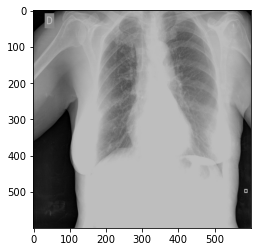

In [19]:
three = cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB)

plt.imshow(three)
plt.show()

In [50]:
# study, image 레벨 분리해서 나누기. - 파라미터로.
# 
   

8it [00:00, 127.35it/s]


In [20]:
!ls


data-threshold.ipynb
easy_infer_load
efficientnet_aug_model
siim-cov19-efnb7-yolov5-infer-e9f603.ipynb
study_keep_ratio_600_png
test_0.png
test_1.png
test_2.png
test_3.png
test_4.png
test_5.png
test_512
test_6.png
test_7.png
total_meta
TRAIN_IMG


## 아래는 테스트

In [ ]:
# No.1  역치 위는 완전 하얗게 역치 아래는 완전 까맣게
import os
import cv2
import matplotlib.pyplot as plt

file_list = ['00086460a852_study.png','00e936c58da6_study.png',
             '01e030757f57_study.png','0369e0385796_study.png',
             '0172a5607c9d_study.png','018c96c9aeff_study.png',
            '019960c57d32_study.png','00792b5c8852_study.png']


def thresh_binary(file_list, thr=117):
    ls = []
    for nm in file_list:
        one_ch = cv2.imread(f'/kaggle/input/siimcovid19-512-img-png-600-study-png/study/{nm}', cv2.IMREAD_GRAYSCALE)
        ret, thres =cv2.threshold(one_ch, thr, 255, cv2.THRESH_BINARY) 
        ls.append(one_ch)
        ls.append(thres)
    
    for idx, i in enumerate(ls):
        if idx % 2 == 0:
            print('#################################')
    #         plt.imshow(i)
    #         plt.show()
        plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
        plt.show()
        
        
    
def thresh_binary_inv(file_list, thr=117):
    ls = []
    for nm in file_list:
        one_ch = cv2.imread(f'/kaggle/input/siimcovid19-512-img-png-600-study-png/study/{nm}', cv2.IMREAD_GRAYSCALE)
        ret, thres =cv2.threshold(one_ch, thr, 255, cv2.THRESH_BINARY_INV) 
        ls.append(one_ch)
        ls.append(thres)
    
    for idx, i in enumerate(ls):
        if idx % 2 == 0:
            print('#################################')
    #         plt.imshow(i)
    #         plt.show()
        plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
        plt.show()

def thresh_trunc(file_list, thr=117):
    ls = []
    for nm in file_list:
        one_ch = cv2.imread(f'/kaggle/input/siimcovid19-512-img-png-600-study-png/study/{nm}', cv2.IMREAD_GRAYSCALE)
        ret, thres =cv2.threshold(one_ch, thr, 255, cv2.THRESH_TRUNC) 
        ls.append(one_ch)
        ls.append(thres)
    
    for idx, i in enumerate(ls):
        if idx % 2 == 0:
            print('#################################')
    #         plt.imshow(i)
    #         plt.show()
        plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
        plt.show()

def thresh_tozero(file_list, thr=117):
    ls = []
    for nm in file_list:
        one_ch = cv2.imread(f'/kaggle/input/siimcovid19-512-img-png-600-study-png/study/{nm}', cv2.IMREAD_GRAYSCALE)
        ret, thres =cv2.threshold(one_ch, thr, 255, cv2.THRESH_TOZERO) 
        ls.append(one_ch)
        ls.append(thres)
    
    # ls = [one_ch, thres]
    for idx, i in enumerate(ls):
        if idx % 2 == 0:
            print('#################################')
    #         plt.imshow(i)
    #         plt.show()
        plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
        plt.show()

def thresh_tozero_inv(file_list, thr=117):
    ls = []
    for nm in file_list:
        one_ch = cv2.imread(f'/kaggle/input/siimcovid19-512-img-png-600-study-png/study/{nm}', cv2.IMREAD_GRAYSCALE)
        ret, thres =cv2.threshold(one_ch, thr, 255, cv2.THRESH_TOZERO_INV) 
        ls.append(one_ch)
        ls.append(thres)
    
    for idx, i in enumerate(ls):
        if idx % 2 == 0:
            print('#################################')
    #         plt.imshow(i)
    #         plt.show()
        plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
        plt.show()

# 적응 임계점 처리
def adap_mean(file_list, type_thr=cv2.THRESH_BINARY, scope=21, minus=3):
    ls = []
    for nm in file_list:
        one_ch = cv2.imread(f'/kaggle/input/siimcovid19-512-img-png-600-study-png/study/{nm}', cv2.IMREAD_GRAYSCALE)
        thres =cv2.adaptiveThreshold(one_ch, 255, cv2.ADAPTIVE_THRESH_MEAN_C, type_thr, scope, minus) 
        ls.append(one_ch)
        ls.append(thres)
    
    for idx, i in enumerate(ls):
        if idx % 2 == 0:
            print('#################################')
    #         plt.imshow(i)
    #         plt.show()
        plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
        plt.show()
        
def adap_gaussian(file_list, type_thr=cv2.THRESH_BINARY, scope=21, minus=3):
    ls = []
    for nm in file_list:
        one_ch = cv2.imread(f'/kaggle/input/siimcovid19-512-img-png-600-study-png/study/{nm}', cv2.IMREAD_GRAYSCALE)
        thres =cv2.adaptiveThreshold(one_ch, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, type_thr, scope, minus) 
        ls.append(one_ch)
        ls.append(thres)
    
    for idx, i in enumerate(ls):
        if idx % 2 == 0:
            print('#################################')
    #         plt.imshow(i)
    #         plt.show()
        plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
        plt.show()
        

In [ ]:
thresh_binary(file_list,  thr=137) # 이건 진짜 아니다..!

In [ ]:
thresh_binary_inv(file_list,  thr=127)

In [ ]:
## binary, binary_inv는 버린다

In [ ]:
# No.3 trunc

# 하얀건 완전 하얗계 -> 노이즈 제거#
# 병변으 더하얗게
thresh_trunc(file_list,  thr=190) 

In [ ]:
# 까만건 더 까맣게 - 노이즈 제거??
thresh_tozero(file_list, 64)

In [ ]:
# No.5

# 하얀걸 까맣게
thresh_tozero_inv(file_list, 190 )

In [ ]:
# No.6
# 81, 101, 61, 41해보기
# adap_mean(file_list, type_thr=cv2.THRESH_BINARY, scope=81, minus=3)
# adap_mean(file_list, type_thr=cv2.THRESH_BINARY, scope=101, minus=3)
# adap_mean(file_list, type_thr=cv2.THRESH_BINARY, scope=61, minus=3)
adap_mean(file_list, type_thr=cv2.THRESH_BINARY, scope=41, minus=3)

In [ ]:
# 81 또는 41 둘다 권장
adap_mean(file_list, type_thr=cv2.THRESH_BINARY_INV, scope=41, minus=3)

In [ ]:
adap_gaussian(file_list, type_thr=cv2.THRESH_BINARY, scope=41, minus=3)